### Max Ranieri - CSC370

Exploring texture with Gabor filters, using scikit. This is a Python adaptation of the exercises [here](http://www.cs.smith.edu/~nhowe/teaching/csc370/Assign/texture.html).

In [177]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from scipy import signal
import scipy.ndimage as ndi

from skimage.filters import gabor_kernel

The following code is a helper function from soply on github: [disp_multiple_images.py](https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1)

In [194]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.axis('off')
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.imshow(image)
        a.set_title(title)
    #fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

I used this code to generate a list of Gabor filter kernels. Theta determines the angle of the filter. The ranges in the for loop can be modified to output different results, but I thought that these were the most interesting for the zebras image.

freq: 0.250000, sigma: 3.000000, theta: 0.628319
freq: 0.250000, sigma: 3.000000, theta: 1.256637
freq: 0.250000, sigma: 3.000000, theta: 1.570796
freq: 0.250000, sigma: 3.000000, theta: 1.884956
freq: 0.250000, sigma: 3.000000, theta: 2.513274
freq: 0.250000, sigma: 3.000000, theta: 3.141593


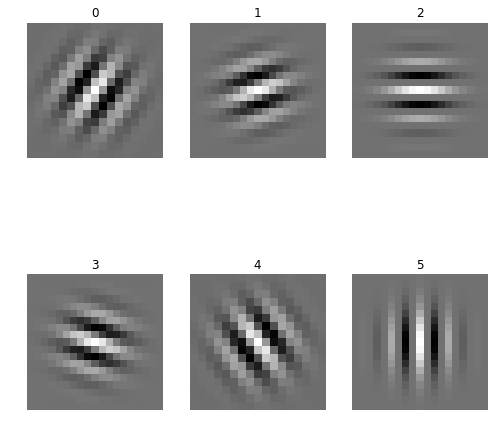

In [198]:
kernels = []
for theta in [1, 2, 2.5, 3, 4, 5]:
    theta = theta / 5. * np.pi
    for sigma in [3]:
        for frequency in [0.25]:
            print('freq: %f, sigma: %f, theta: %f' % (frequency, sigma,theta))
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)
ktitles = [str(x) for x in range(len(kernels))]
show_images(kernels, 2, ktitles)

To my eyes, it looks like kernel 3 may capture the zebras most succesfully, based on its orientation. I decided to try this one first:

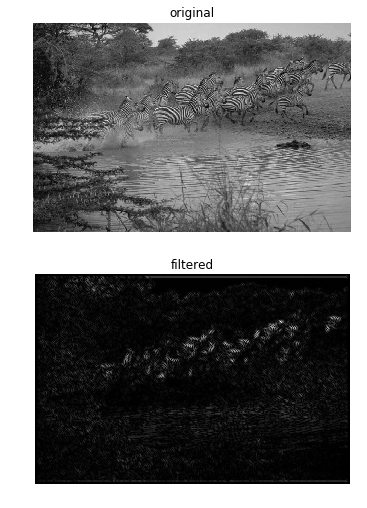

In [197]:
img = mpimg.imread("zebras.jpg")

filtered = np.abs(signal.convolve2d(img,kernels[3]))
show_images([img,filtered], 2, ['original', 'filtered'])

However, it seems to have not only captured the zebras but also some other features, in particular the water, as well as some of the trees. I went through the other kernels next:

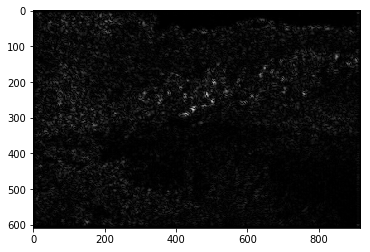

In [175]:
filtered = np.abs(signal.convolve2d(img,kernels[0]))
plt.imshow(filtered)
plt.show()

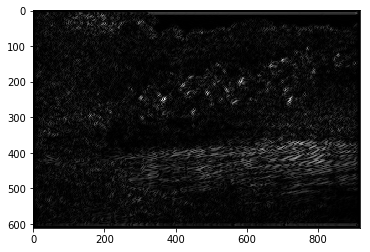

In [173]:
filtered = np.abs(signal.convolve2d(img,kernels[1]))
plt.imshow(filtered)
plt.show()

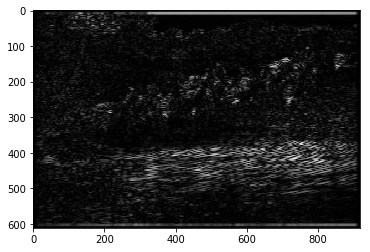

In [174]:
filtered = np.abs(signal.convolve2d(img,kernels[2]))
plt.imshow(filtered)
plt.show()

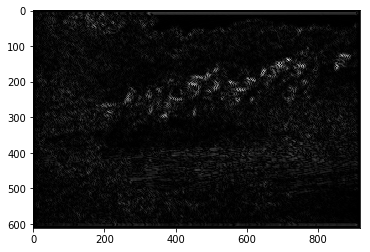

In [172]:
filtered = np.abs(signal.convolve2d(img,kernels[3]))
plt.imshow(filtered)
plt.show()

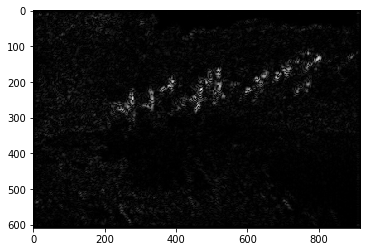

In [171]:
filtered = np.abs(signal.convolve2d(img,kernels[4]))
plt.imshow(filtered)
plt.show()

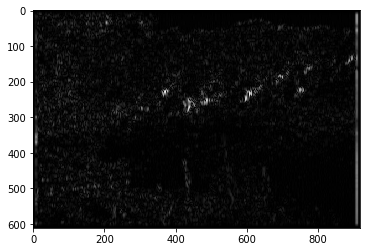

In [170]:
filtered = np.abs(signal.convolve2d(img,kernels[5]))
plt.imshow(filtered)
plt.show()

In fact it seems that kernels 4 and 5 detected the least non-zebra texture, while still picking up some of the zebras. I thought 0 (a mirror image of 4) was also moderately good. The others, while finding the zebras, also had strong responses to the water and to some extent the foliage.

Next, I smoothed and subsampled the image to try the filters at a smaller scale.

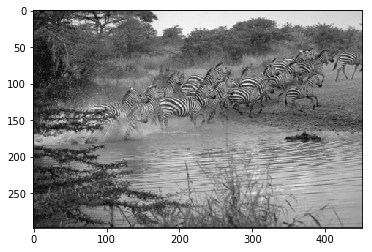

In [187]:
subsample_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) /16.
img_half = signal.convolve2d(img, subsample_filter)
img_half = img_half[::2,::2]
plt.imshow(img_half)
plt.show()

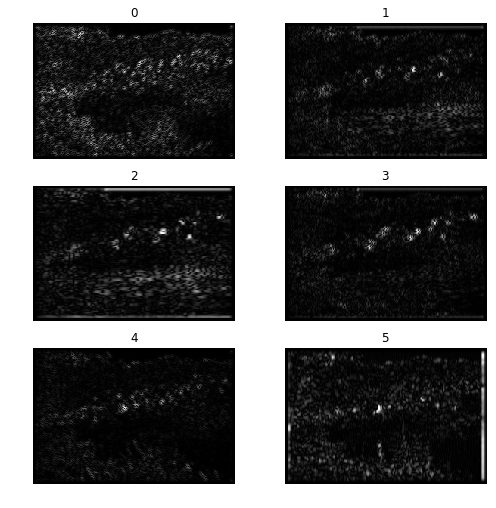

In [195]:
imgs = []
for kernel in kernels:
    imgs.append(np.abs(signal.convolve2d(img_half,kernel)))

show_images(imgs, 3, ktitles)

How the re-scaling affected the filtering seems to depend on the kernel. For some, such as 5 and 0, a lot more noise is introduced. On the other hand, 3 actually seems to fair better here.